In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
qatarcars = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-09/qatarcars.csv")

In [4]:
qatarcars["EUR"] = qatarcars["price"] / 3.64
qatarcars["USD"] = qatarcars["price"] / 4.15

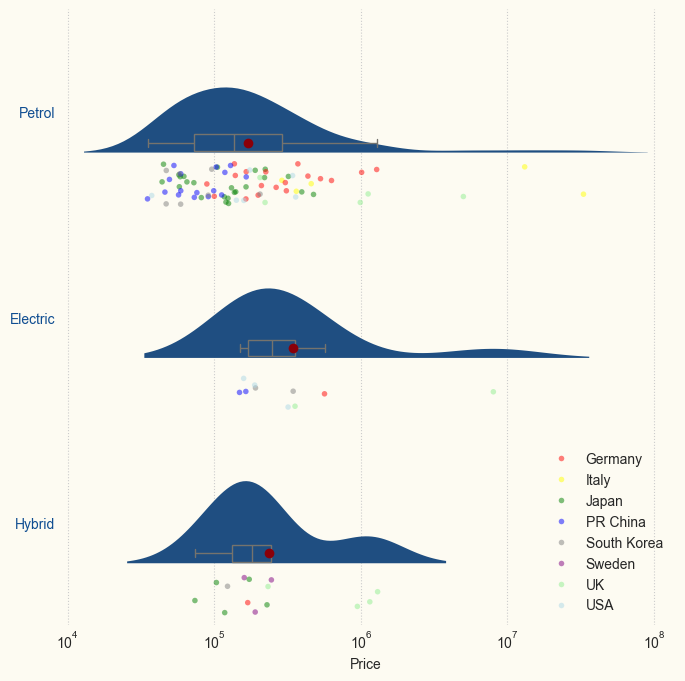

In [5]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xscale("log")

# Violin plots 
sns.violinplot(x="price", y="enginetype", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.5, inner=None, ax=ax) 

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="price", y="enginetype", hue="origin", data=qatarcars,  palette=["red", "yellow", "green", "blue", "grey", "purple", "lightgreen", "lightblue"],
              alpha=0.5, size=4, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.35)

# Vertical positions for the boxplots
POSITIONS = [0.15, 1.15, 2.15]

# Boxplots 
sns.boxplot(x="price", y="enginetype", data=qatarcars, width=0.08, positions=POSITIONS, showfliers=False, showmeans=True, 
            meanprops=dict(marker="o", markerfacecolor="#8a0009", markeredgecolor="none", markersize=7, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), edgecolor="#75736D", linewidth=1, zorder=3),
            whiskerprops=dict(linewidth=1, color="#75736D"),
            capprops=dict(linewidth=1, color="#75736D"),
            medianprops=dict(linewidth=1, color="#75736D"))


# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

    
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.set_xlabel("Price")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

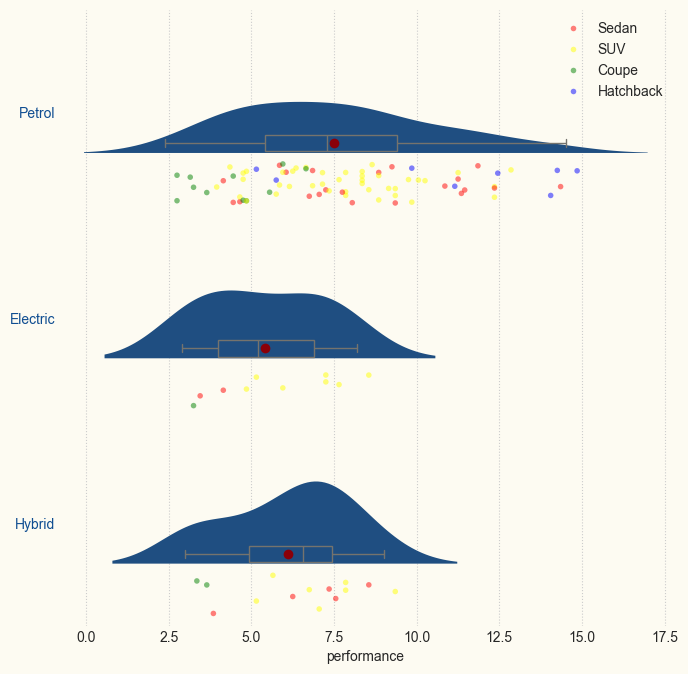

In [6]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(8, 8))

#ax.set_xscale("log")

# Violin plots 
sns.violinplot(x="performance", y="enginetype", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.5, inner=None, ax=ax) 

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="enginetype", hue="type", data=qatarcars,  palette=["red", "yellow", "green", "blue"],
              alpha=0.5, size=4, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.35)

# Vertical positions for the boxplots
POSITIONS = [0.15, 1.15, 2.15]

# Boxplots 
sns.boxplot(x="performance", y="enginetype", data=qatarcars, width=0.08, positions=POSITIONS, showfliers=False, showmeans=True, 
            meanprops=dict(marker="o", markerfacecolor="#8a0009", markeredgecolor="none", markersize=7, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), edgecolor="#75736D", linewidth=1, zorder=3),
            whiskerprops=dict(linewidth=1, color="#75736D"),
            capprops=dict(linewidth=1, color="#75736D"),
            medianprops=dict(linewidth=1, color="#75736D"))


# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

    
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
#ax.set_xlabel("Price")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

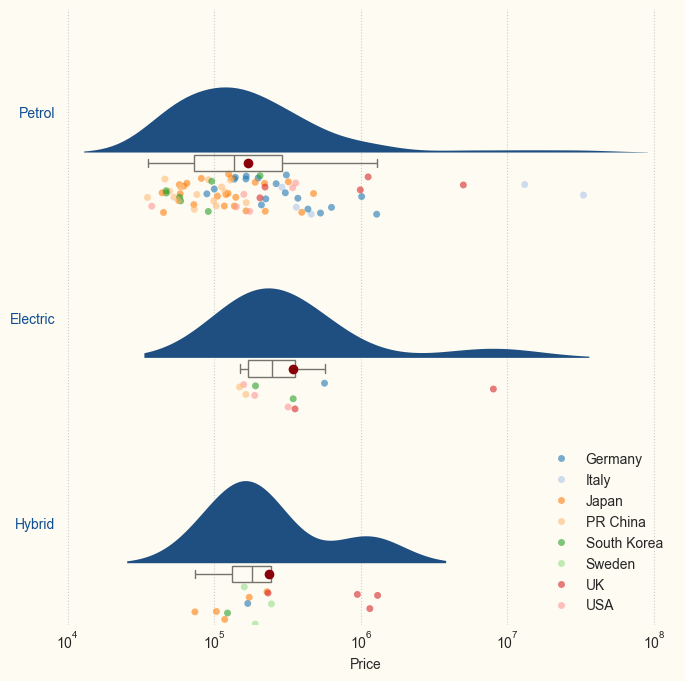

In [7]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xscale("log")

# Violin plots 
sns.violinplot(x="price", y="enginetype", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.5, inner=None, ax=ax) 

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="price", y="enginetype", hue="origin", data=qatarcars,  palette="tab20",
              alpha=0.6, size=5, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.4)

# Vertical positions for the boxplots
POSITIONS = [0.25, 1.25, 2.25]

# Boxplots 
sns.boxplot(x="price", y="enginetype", data=qatarcars, width=0.08, positions=POSITIONS, showfliers=False, showmeans=True, 
            meanprops=dict(marker="o", markerfacecolor="#8a0009", markeredgecolor="none", markersize=7, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), edgecolor="#75736D", linewidth=1, zorder=3),
            whiskerprops=dict(linewidth=1, color="#75736D"),
            capprops=dict(linewidth=1, color="#75736D"),
            medianprops=dict(linewidth=1, color="#75736D"))


# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

    
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.set_xlabel("Price")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

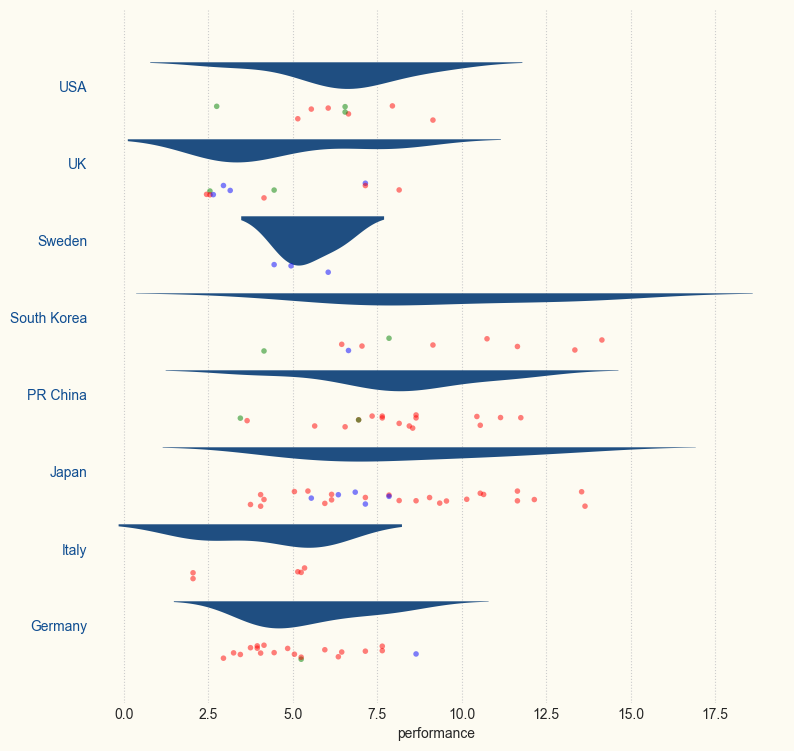

In [8]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(9, 9))

# Violin plots 
sns.violinplot(x="performance", y="origin", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.2, inner=None, ax=ax) 

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="origin", hue="enginetype", data=qatarcars,  palette=["red", "green", "blue"], alpha=0.5, size=4, legend=False, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets - 0.35)

# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

ax.set_ylim(-1, 8)
    
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

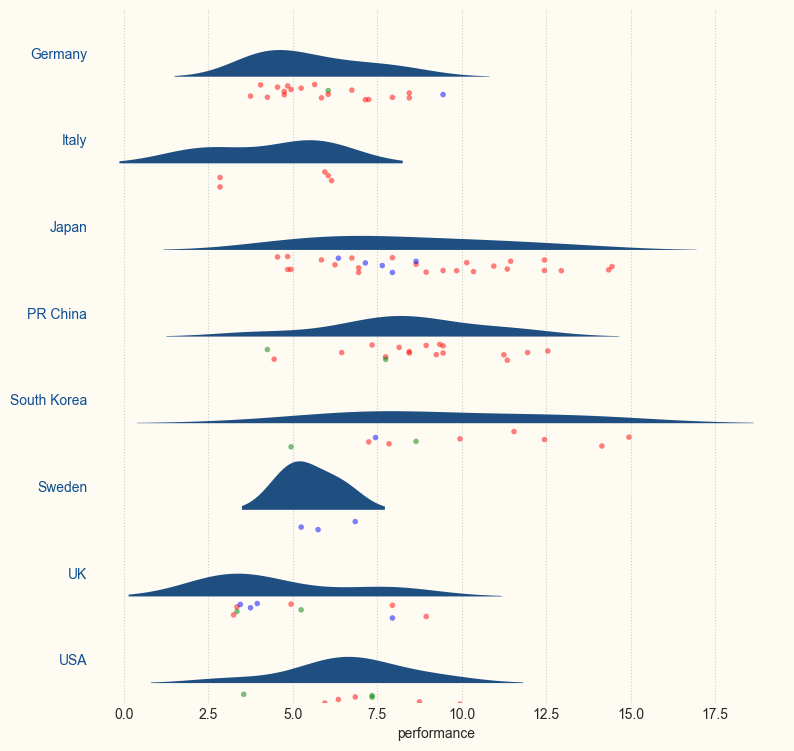

In [9]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(9, 9))

POSITIONS_VIOLIN = [1, 3, 5, 7, 9, 11, 13, 15]

# Violin plots 
ax=sns.violinplot(x="performance", y="origin", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.3, inner=None) 

# Set y-ticks 
#ax.set_yticks(POSITIONS_VIOLIN)

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="origin", hue="enginetype", data=qatarcars,  palette=["red", "green", "blue"], alpha=0.5, size=4, legend=False, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.45)

# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

   
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

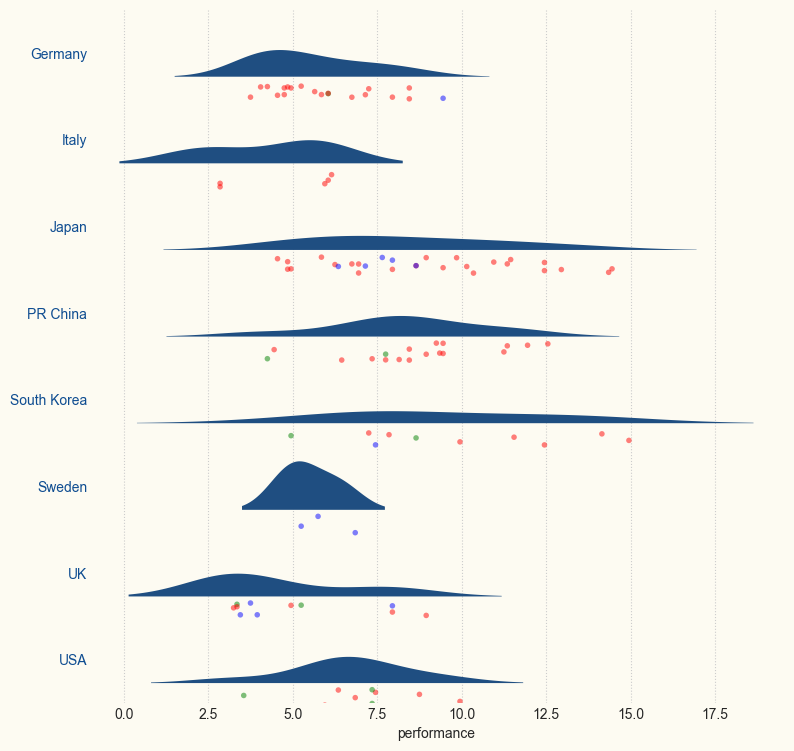

In [10]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(9, 9))

POSITIONS_VIOLIN = [1, 3, 5, 7, 9, 11, 13, 15]

# Violin plots 
ax=sns.violinplot(x="performance", y="origin", data=qatarcars, split=True, color="#0F4D91", linecolor="none", gap=0.3, inner=None) 

# Set y-ticks 
#ax.set_yticks(POSITIONS_VIOLIN)

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="origin", hue="enginetype", data=qatarcars,  palette=["red", "green", "blue"], alpha=0.5, size=4, legend=False, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.45)

# Change color for y labels
ax.tick_params(
  axis="y",  
  labelcolor="#0F4D91",   
  pad=0  
)

   
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_facecolor("#FDFBF2")
fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

In [11]:
qatarcars = qatarcars.sort_values(by="performance")

In [12]:
qatarcars

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype,EUR,USD
18,Italy,Bugatti,Centodieci,4.544,2.047,1.200,2,0,22.5,1600,33000000,1976,2.4,Coupe,Petrol,9.065934e+06,7.951807e+06
17,Italy,Bugatti,Chiron,4.544,2.037,1.212,2,45,22.3,1578,13103960,1996,2.4,Coupe,Petrol,3.599989e+06,3.157581e+06
76,UK,McLaren,Senna,4.744,2.153,1.195,2,0,12.4,800,5000000,1198,2.8,Coupe,Petrol,1.373626e+06,1.204819e+06
75,UK,Lotus,Evija,4.459,2.000,1.122,2,0,NaN,1973,8010200,1887,2.9,Coupe,Electric,2.200604e+06,1.930169e+06
77,UK,McLaren,720S,4.543,2.059,1.196,2,0,10.7,710,1120000,1283,2.9,Coupe,Petrol,3.076923e+05,2.698795e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,Japan,Mitsubishi,Xpander,4.475,1.750,1.695,7,781,6.7,105,65000,1255,12.5,SUV,Petrol,1.785714e+04,1.566265e+04
100,South Korea,Kia,Picanto,3.595,1.595,1.495,5,255,6.0,84,58000,976,13.7,Hatchback,Petrol,1.593407e+04,1.397590e+04
102,Japan,Mitsubishi,Mirage,3.780,1.665,1.500,5,235,4.8,77,44000,1050,13.9,Hatchback,Petrol,1.208791e+04,1.060241e+04
41,Japan,Mitsubishi,Attrage,4.245,1.670,1.515,5,450,4.8,76,45000,945,14.0,Sedan,Petrol,1.236264e+04,1.084337e+04


In [13]:
# Return rows with min values of performance per group
idxmin_rows = qatarcars.loc[qatarcars.groupby("enginetype")["performance"].idxmin()]
idxmin_rows

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype,EUR,USD
75,UK,Lotus,Evija,4.459,2.000,1.122,2,0,NaN,1973,8010200,1887,2.9,Coupe,Electric,2.200604e+06,1.930169e+06
78,UK,McLaren,Artura,4.539,1.976,1.193,2,0,4.6,671,945700,1395,3.0,Coupe,Hybrid,2.598077e+05,2.278795e+05
18,Italy,Bugatti,Centodieci,4.544,2.047,1.200,2,0,22.5,1600,33000000,1976,2.4,Coupe,Petrol,9.065934e+06,7.951807e+06


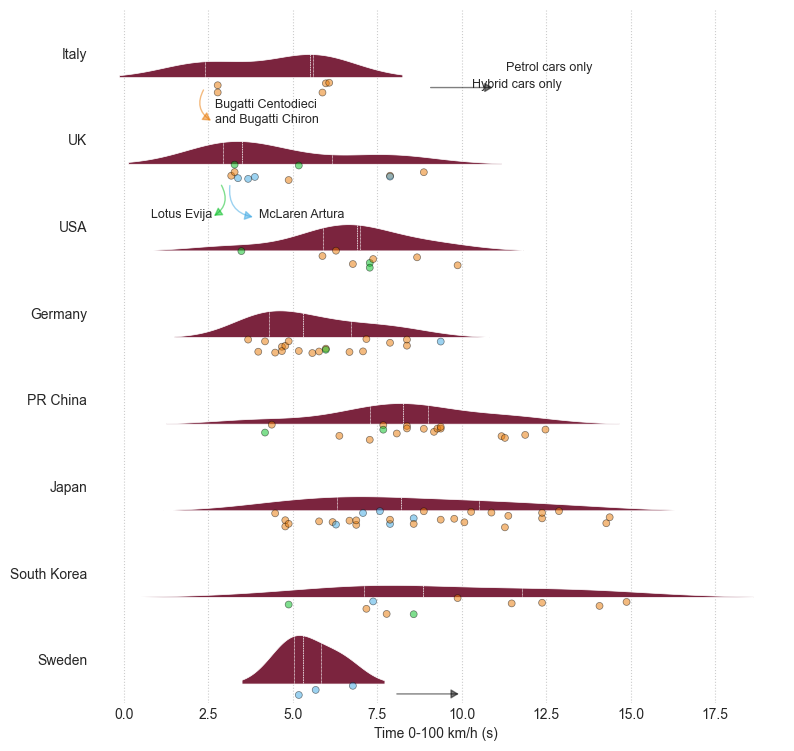

In [15]:
from drawarrow import ax_arrow

# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(9, 9))

POSITIONS_VIOLIN = [1, 3, 5, 7, 9, 11, 13, 15]

# Violin plots 
ax=sns.violinplot(x="performance", y="origin", data=qatarcars, split=True, color="#8A1538", linecolor="white", linewidth=0.5, gap=0.3, inner="quart") 

# Set y-ticks 
#ax.set_yticks(POSITIONS_VIOLIN)

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="origin", hue="enginetype", data=qatarcars,  palette=["#E87701", "#00BE1F", "#3AA6E3"], edgecolor="black", linewidth=0.5, 
              alpha=0.5, size=5, legend=False, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.35 jitter to the strip plots
    item.set_offsets(current_offsets + 0.38)

ax_arrow(
   tail_position=[2.4, 0.4],
   head_position=[2.65, 0.8],
   color="#E87701",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=0.5,
   ax=ax,
)

ax.text(2.7, 0.8, s="Bugatti Centodieci\nand Bugatti Chiron", size=9)

ax_arrow(
   tail_position=[2.85, 1.5],
   head_position=[2.6, 1.9],
   color="#00BE1F",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=-0.5,
   ax=ax,
)

ax.text(0.8, 1.9, s="Lotus Evija", size=9)

ax_arrow(
   tail_position=[3.15, 1.5],
   head_position=[3.9, 1.9],
   color="#3AA6E3",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=0.5,
   ax=ax,
)

ax.text(4, 1.9, s="McLaren Artura", size=9)

ax_arrow(
   tail_position=[9, 0.4],
   head_position=[11, 0.4],
   color="black",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   ax=ax,
)

ax.text(11.3, 0.2, s="Petrol cars only", size=9)

ax_arrow(
   tail_position=[8, 7.4],
   head_position=[10, 7.4],
   color="black",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   ax=ax,
)

ax.text(10.3, 0.4, s="Hybrid cars only", size=9)

# Change color for y labels
ax.tick_params(
  axis="y",  
#  labelcolor="#8A1538",   
  pad=0  
)
   
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
ax.set_xlabel("Time 0-100 km/h (s)")
#ax.set_facecolor("#f5f5f1")
#fig.set_facecolor("#FDFBF2")

# Title
#fig.text(-0.07, 0.92, "\nTitle", size=22, weight="bold", alpha=0.8) 

# Add caption
#fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()